# Capstone-Visualizations & Segmentation

##### Author   : Mehrnoosh Behzadi
##### Contact : mehrnoosh.behzadi@gmail.com
##### Date       : June 27th, 2023

### Segmentation of Tumour in pre-operative MRI scans

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import nibabel as nib
import re

In [2]:
# Read in and store the clinical data 
df_clinical = pd.read_csv('UCSF-PDGM-metadata_v2.csv')

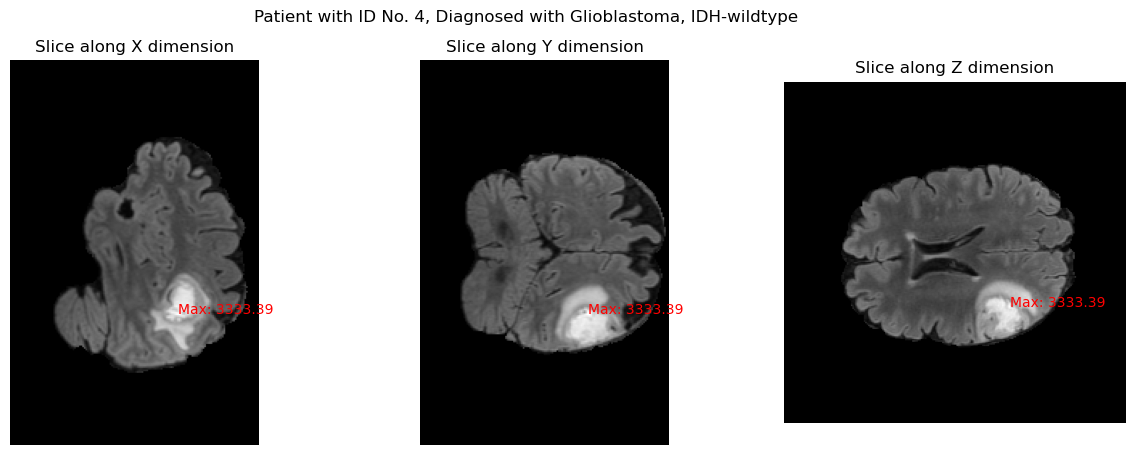

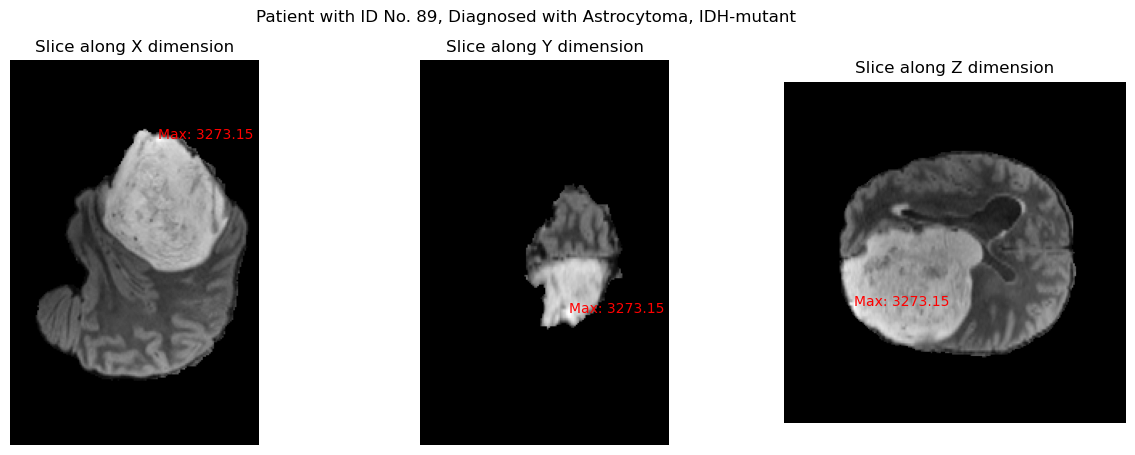

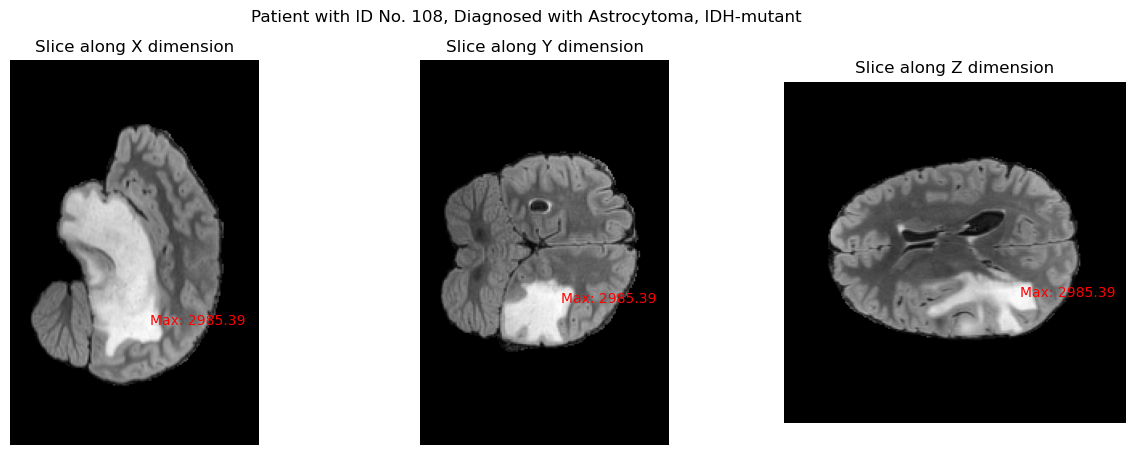

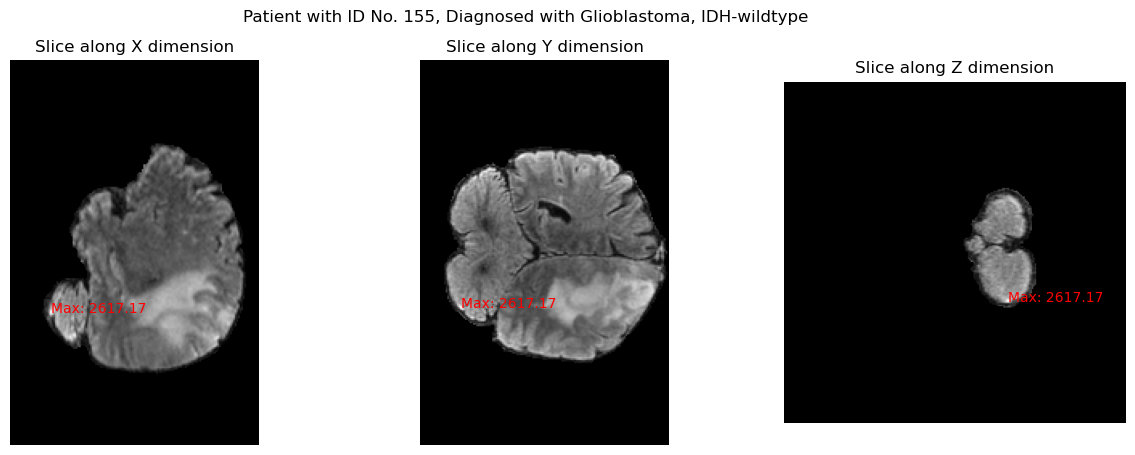

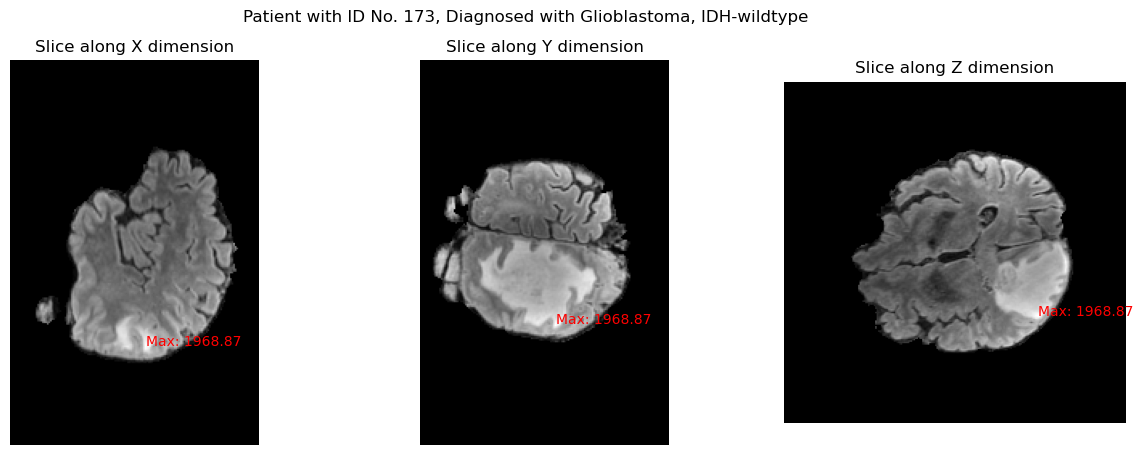

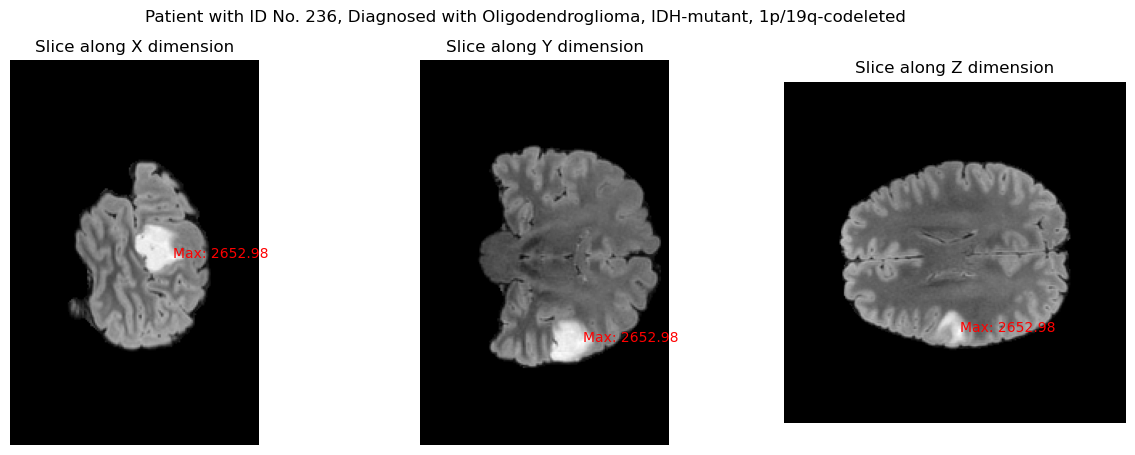

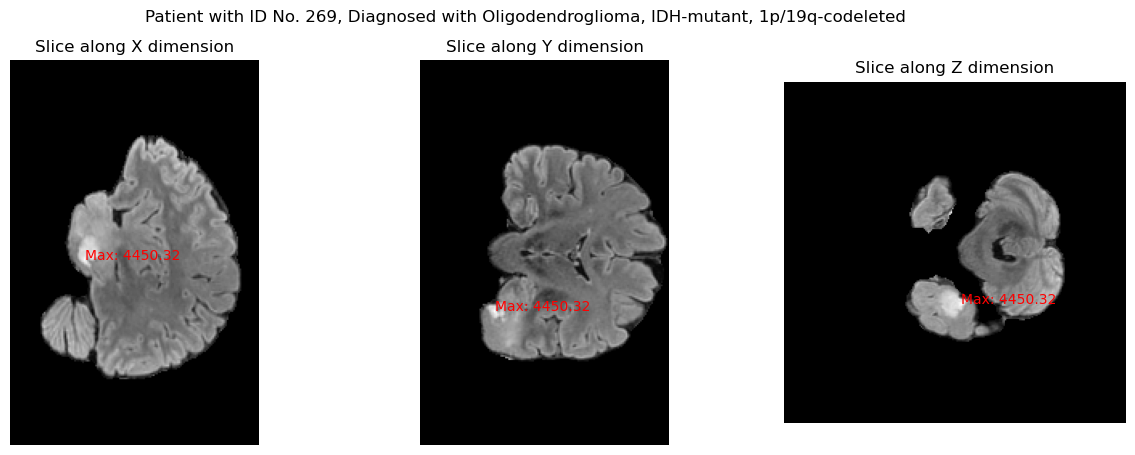

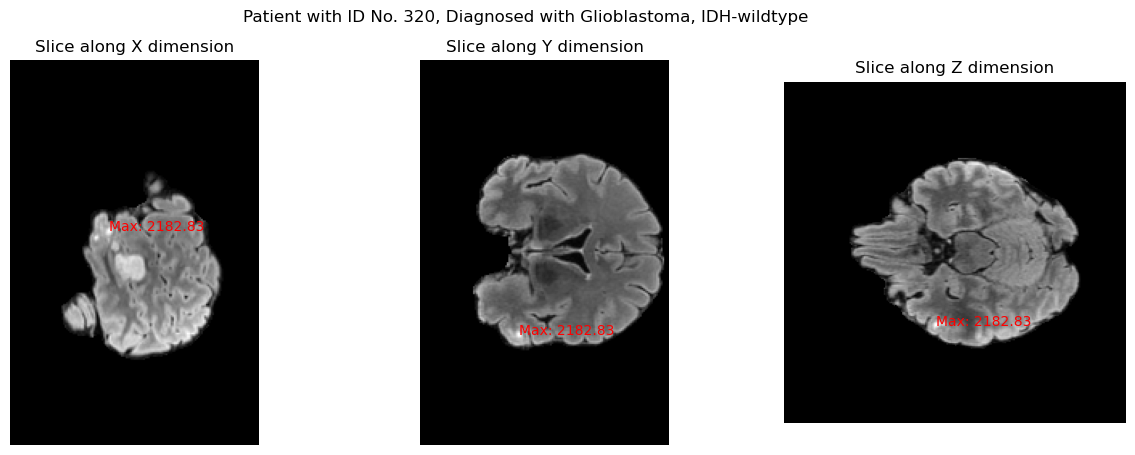

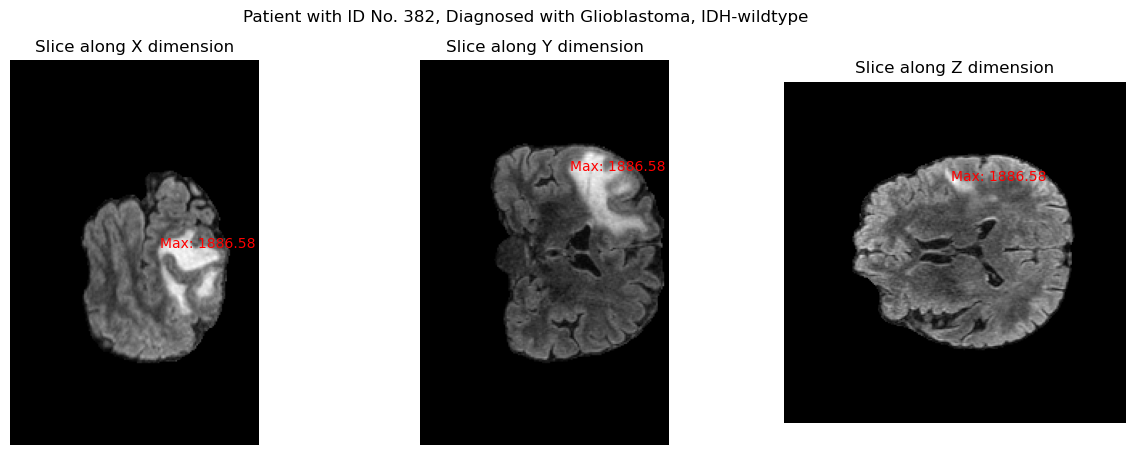

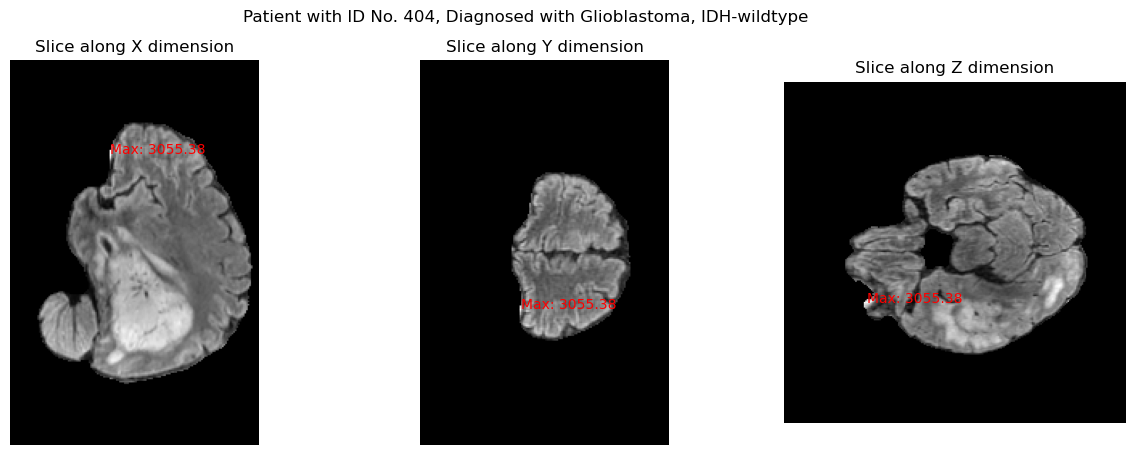

In [3]:
# Specify the folder path where the images are located
folder_path = 'The University of California San Francisco Preoperative Diffuse Glioma MRI (UCSF-PDGM)'

# Load and extract the 2D slices along X, Y, and Z dimensions
for file_name in os.listdir(folder_path):
    if file_name.endswith('.nii.gz'):
        file_path = os.path.join(folder_path, file_name)
        
        # Load the image using nibabel
        image = nib.load(file_path)
        data = image.get_fdata()
        
        # Extract the numeric part from the image name and remove the first zero
        numeric_part = re.search(r'0*(\d+)', file_name).group(1)
        
        # Find the corresponding row in the data frame using the ID column
        row = df_clinical[df_clinical['ID'].str.contains(numeric_part)]
        
        diagnosis = row['Final pathologic diagnosis (WHO 2021)'].values[0]
        
        # Find the maximum value in the image - we're assuming that the maximum value belongs to the tumor
        max_value = np.max(data[150:240, :, :])
            
        # Find the indices where the maximum value occurs
        max_indices = np.where(data == max_value)
            
        # Extract the sections containing the maximum value
        slice_x = data[max_indices[0][0], :, :]
        slice_y = data[:, max_indices[1][0], :]
        slice_z = data[:, :, max_indices[2][0]]
            
        # Plot the tumor slices with the maximum value highlighted in red
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
            
        axes[0].imshow(slice_x, cmap='gray')
        axes[0].set_title('Slice along X dimension')
        axes[0].axis('off')
        axes[0].text(max_indices[2][0], max_indices[1][0], f"Max: {max_value:.2f}", color='red')
            
        axes[1].imshow(slice_y, cmap='gray')
        axes[1].set_title('Slice along Y dimension')
        axes[1].axis('off')
        axes[1].text(max_indices[2][0], max_indices[0][0], f"Max: {max_value:.2f}", color='red')
            
        axes[2].imshow(slice_z, cmap='gray')
        axes[2].set_title('Slice along Z dimension')
        axes[2].axis('off')
        axes[2].text(max_indices[1][0], max_indices[0][0], f"Max: {max_value:.2f}", color='red')
            
        plt.suptitle(f"Patient with ID No. {numeric_part}, Diagnosed with {diagnosis}")
        plt.show()

In [4]:
image.shape

(240, 240, 155)

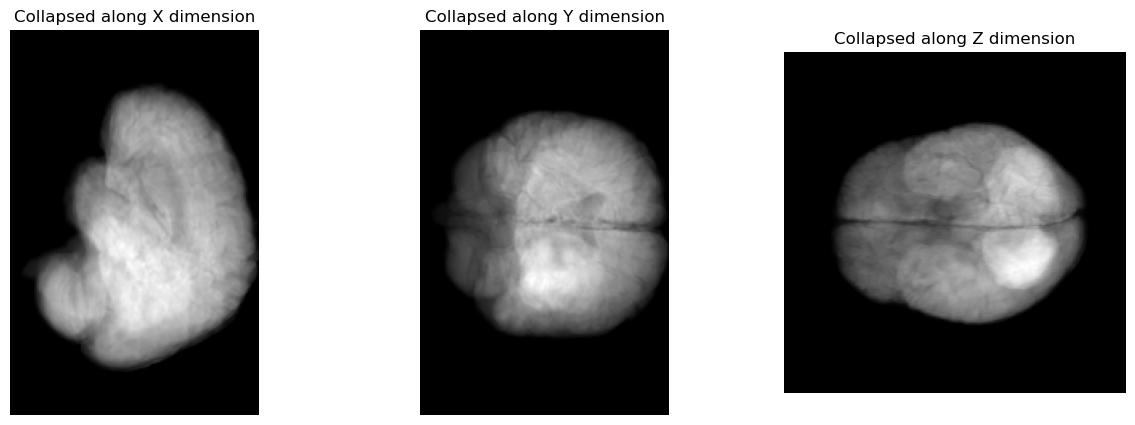

In [5]:
# Obtain a representative value for each element in the matrix by collapsing the matrix along a specific dimension using the average value along that dimension
collapsed_matrix_z = np.mean(data, axis=2)
collapsed_matrix_y = np.mean(data, axis=1)
collapsed_matrix_x = np.mean(data, axis=0)

# Plotting the collapsed matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting the collapsed matrix along the x-axis
axes[0].imshow(collapsed_matrix_x, cmap='gray')
axes[0].set_title('Collapsed along X dimension')
axes[0].axis('off')

# Plotting the collapsed matrix along the y-axis
axes[1].imshow(collapsed_matrix_y, cmap='gray')
axes[1].set_title('Collapsed along Y dimension')
axes[1].axis('off')
    
# Plotting the collapsed matrix along the z-axis
axes[2].imshow(collapsed_matrix_z, cmap='gray')
axes[2].set_title('Collapsed along Z dimension')
axes[2].axis('off')

plt.show()

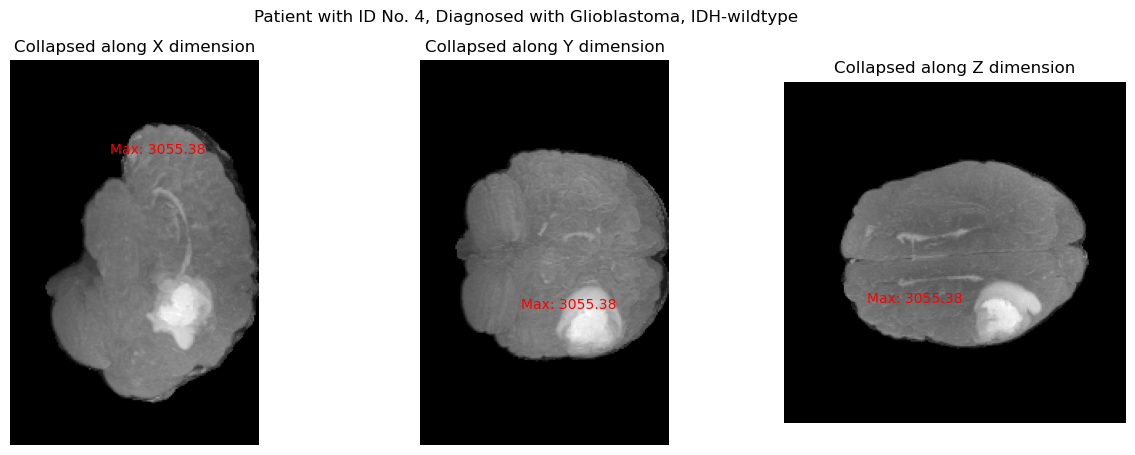

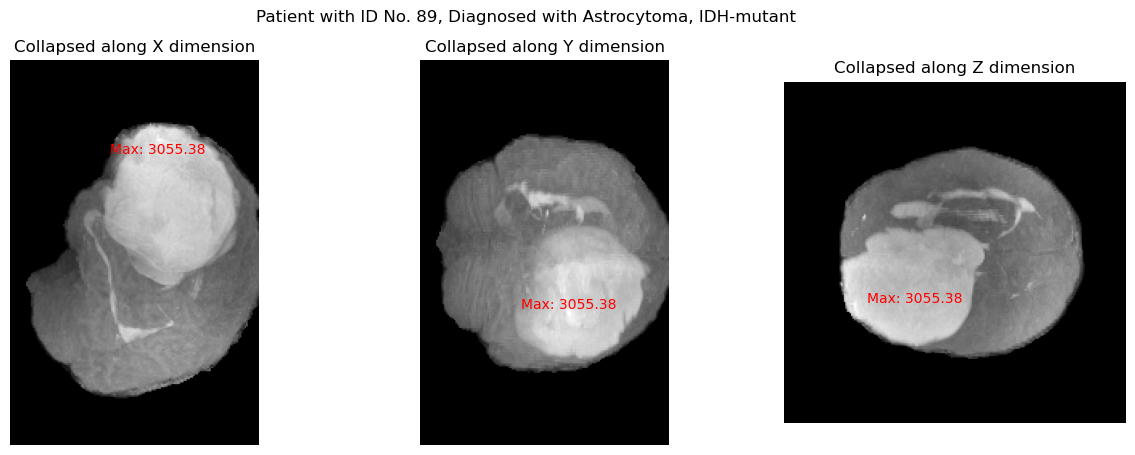

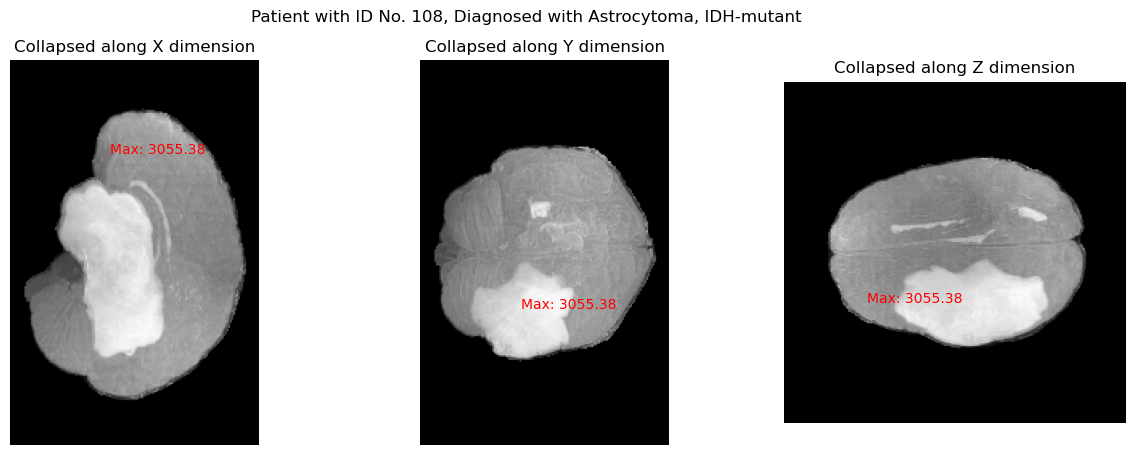

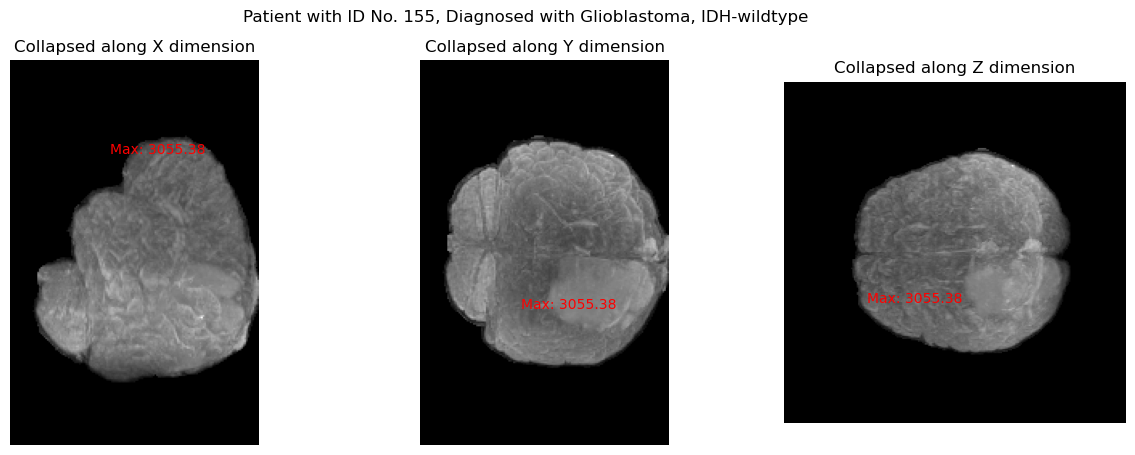

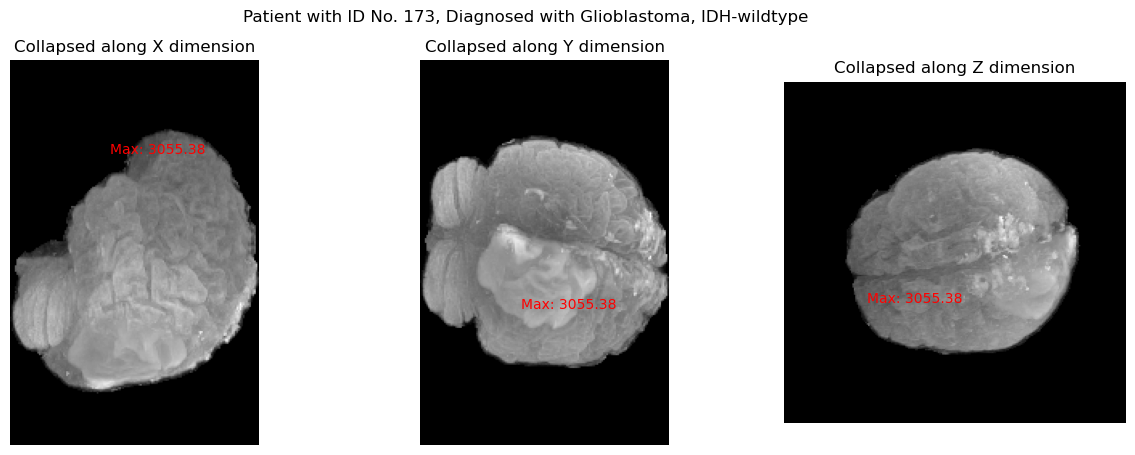

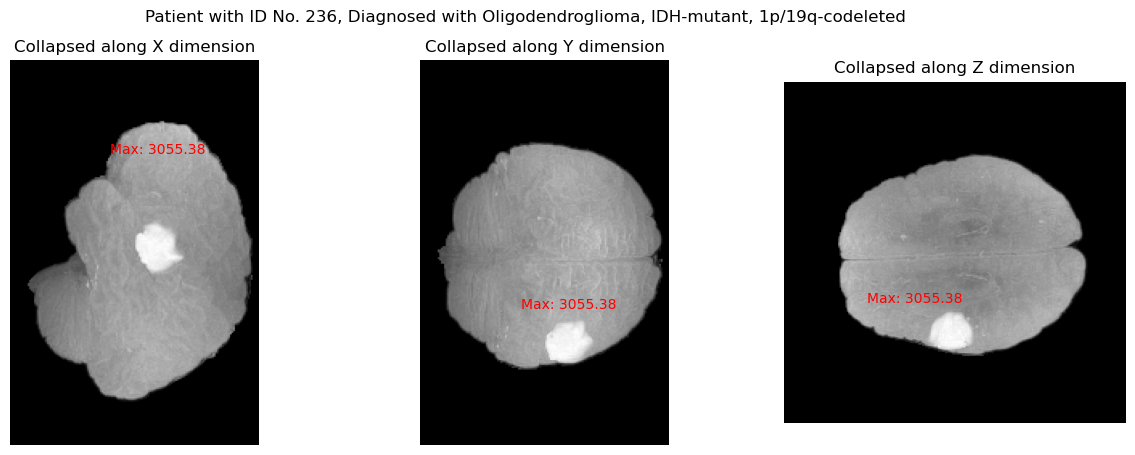

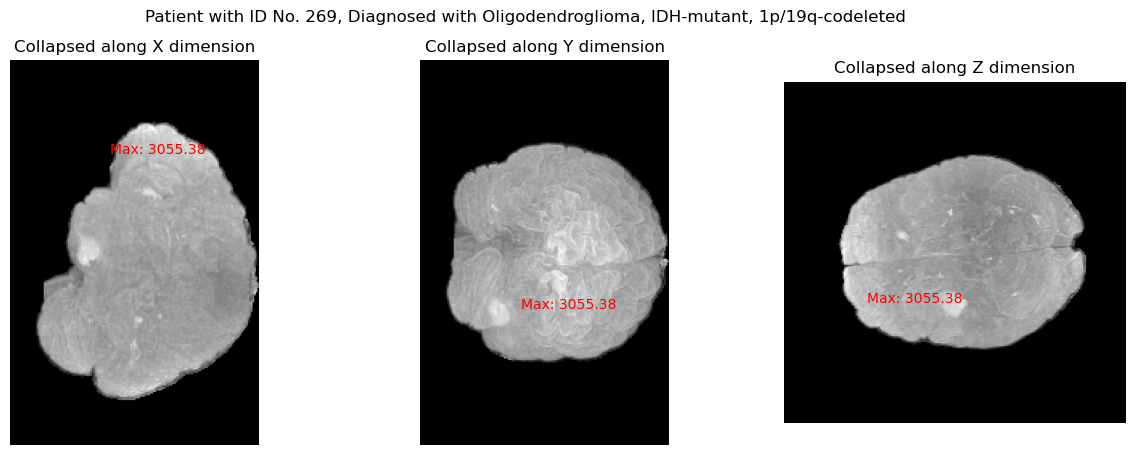

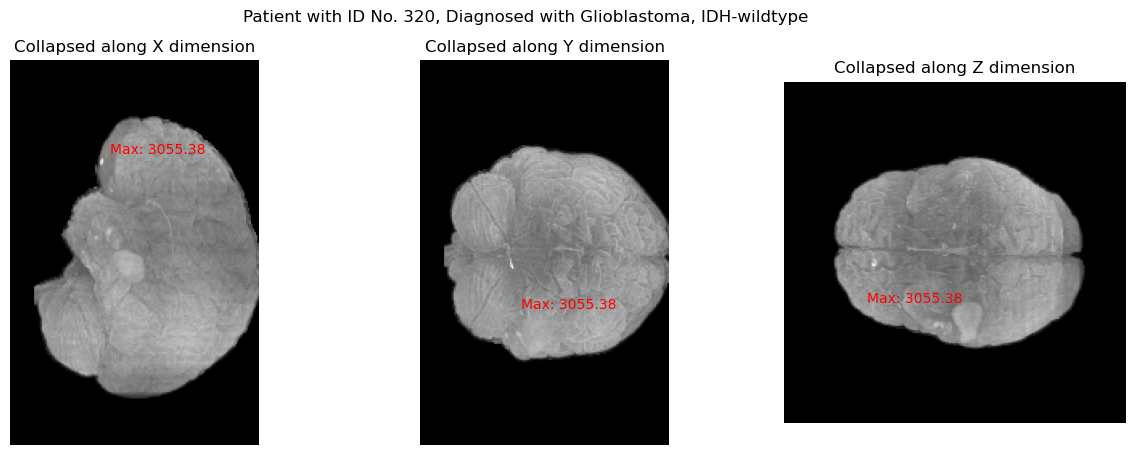

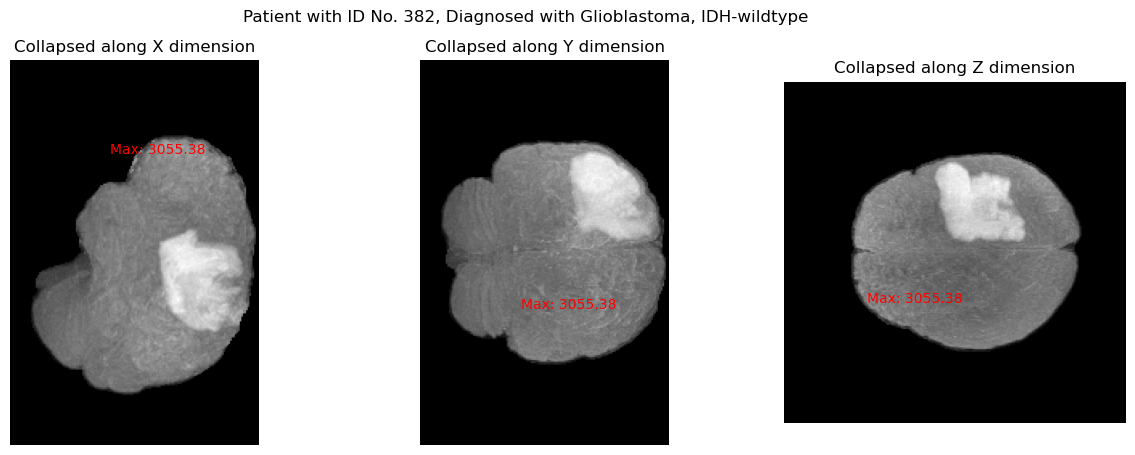

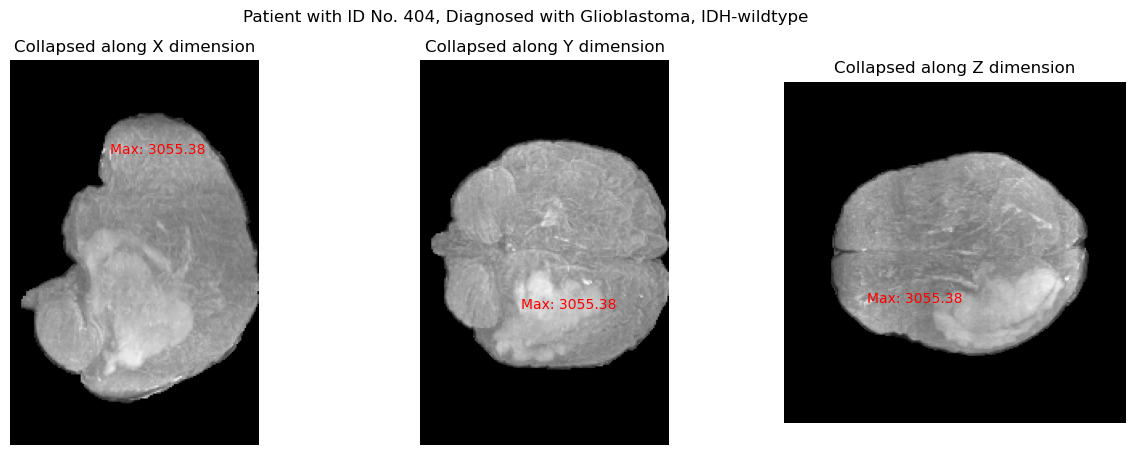

In [6]:
# Specify the folder path where the images are located
folder_path = 'The University of California San Francisco Preoperative Diffuse Glioma MRI (UCSF-PDGM)'

# Load and extract the 2D slices along X, Y, and Z dimensions
for file_name in os.listdir(folder_path):
    if file_name.endswith('.nii.gz'):
        file_path = os.path.join(folder_path, file_name)
        
        # Load the image using nibabel
        image = nib.load(file_path)
        data = image.get_fdata()
        
        # Extract the numeric part from the image name and remove the first zero
        numeric_part = re.search(r'0*(\d+)', file_name).group(1)
        
        # Find the corresponding row in the data frame using the ID column
        row = df_clinical[df_clinical['ID'].str.contains(numeric_part)]
        
        diagnosis = row['Final pathologic diagnosis (WHO 2021)'].values[0]
        
        # Obtain a representative value for each element in the matrix by collapsing the matrix along a specific dimension using the max value along that dimension
        collapsed_matrix_z = np.max(data, axis=2)
        collapsed_matrix_y = np.max(data, axis=1)
        collapsed_matrix_x = np.max(data, axis=0)

        # Plotting the collapsed matrices
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        # Plotting the collapsed matrix along the x-axis
        axes[0].imshow(collapsed_matrix_x, cmap='gray')
        axes[0].set_title('Collapsed along X dimension')
        axes[0].axis('off')
        axes[0].text(max_indices[2][0], max_indices[1][0], f"Max: {max_value:.2f}", color='red')

        # Plotting the collapsed matrix along the y-axis
        axes[1].imshow(collapsed_matrix_y, cmap='gray')
        axes[1].set_title('Collapsed along Y dimension')
        axes[1].axis('off')
        axes[1].text(max_indices[2][0], max_indices[0][0], f"Max: {max_value:.2f}", color='red')
    
        # Plotting the collapsed matrix along the z-axis
        axes[2].imshow(collapsed_matrix_z, cmap='gray')
        axes[2].set_title('Collapsed along Z dimension')
        axes[2].axis('off')
        axes[2].text(max_indices[1][0], max_indices[0][0], f"Max: {max_value:.2f}", color='red')

            
        plt.suptitle(f"Patient with ID No. {numeric_part}, Diagnosed with {diagnosis}")
        plt.show()

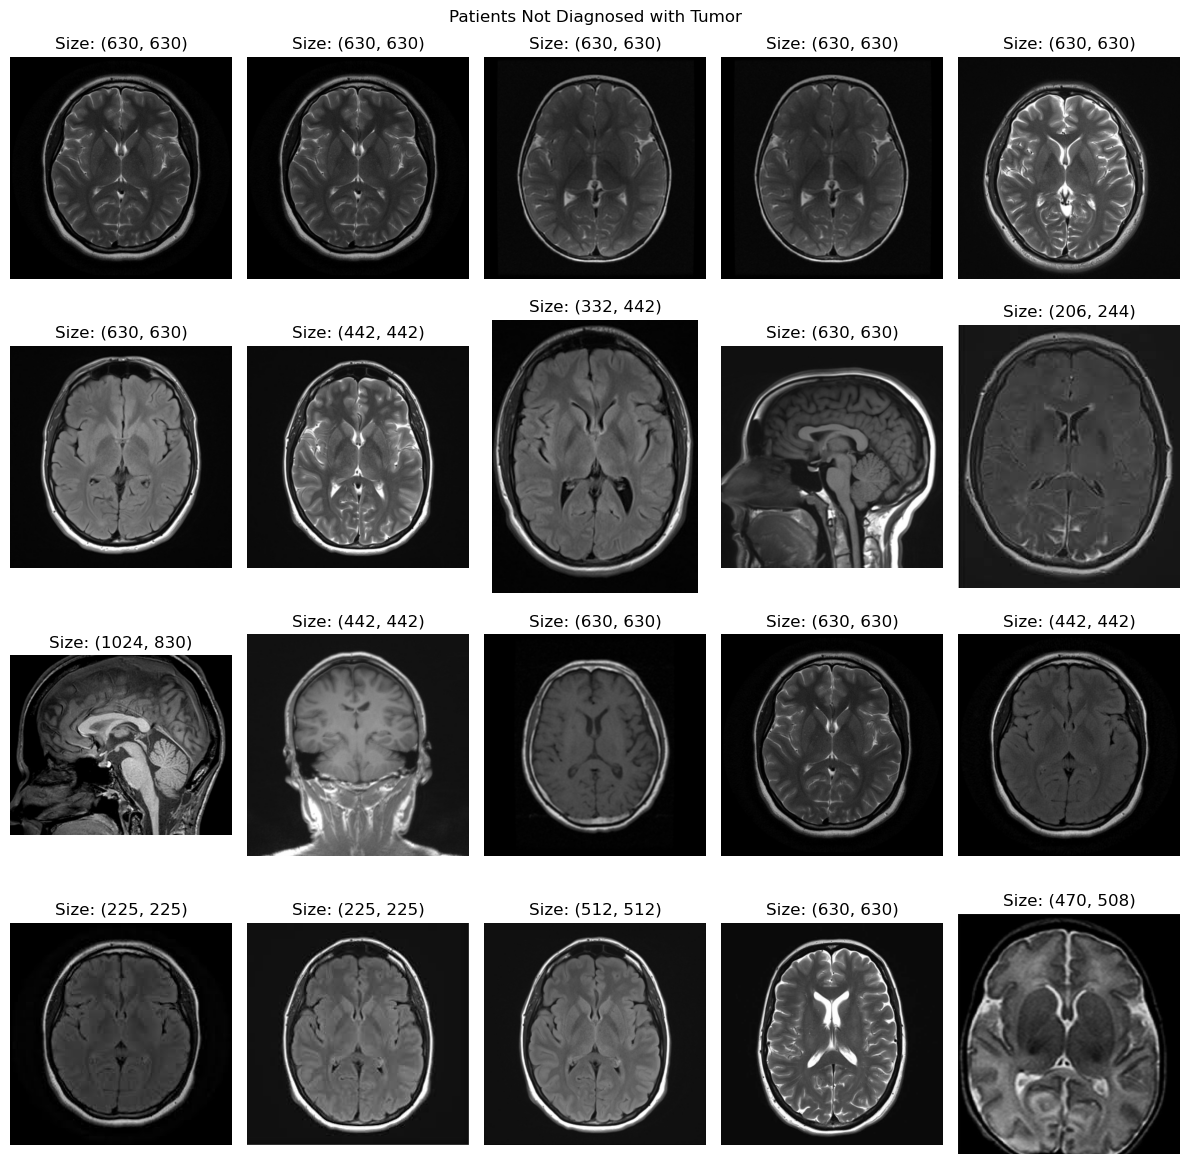

In [12]:
# Path to the directory containing the JPG files
directory = r'C:\Users\mojta\Downloads\MRIs\Training\noTumor'

# Get the list of files in the directory
files = os.listdir(directory)

# Filter only the JPG files
jpg_files = [file for file in files if file.endswith('.jpg')]

# Sort the files alphabetically
jpg_files.sort()

# Plot the first 10 images
fig = plt.figure(figsize=(12, 12))

for i in range(20):
    # Load and display the image
    image_path = os.path.join(directory, jpg_files[i])
    image = Image.open(image_path)
    ax = fig.add_subplot(4, 5, i + 1)
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(f"Size: {image.size}")

plt.suptitle(f"Patients Not Diagnosed with Tumor")
plt.tight_layout()
plt.show()

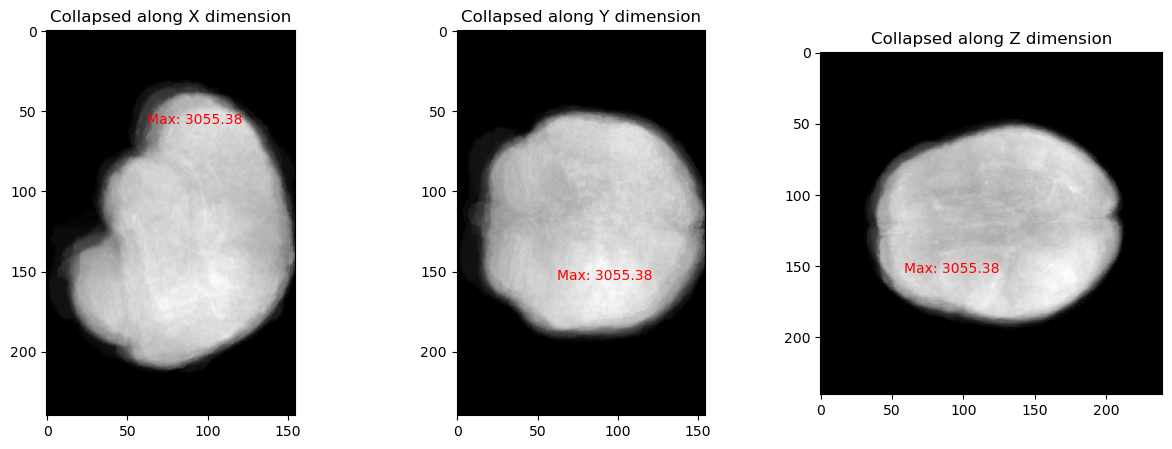

In [8]:
# Specify the folder path where the images are located
folder_path = 'The University of California San Francisco Preoperative Diffuse Glioma MRI (UCSF-PDGM)'

# Create empty lists to store the matrices
matrix_z = []
matrix_y = []
matrix_x = []

# Load and extract the 2D slices along X, Y, and Z dimensions
for file_name in os.listdir(folder_path):
    if file_name.endswith('.nii.gz'):
        file_path = os.path.join(folder_path, file_name)
        
        # Load the image using nibabel
        image = nib.load(file_path)
        data = image.get_fdata()
        
        # Obtain a representative value for each element in the matrix by collapsing the matrix along a specific dimension using the max value along that dimension
        collapsed_matrix_z = np.max(data, axis=2)
        collapsed_matrix_y = np.max(data, axis=1)
        collapsed_matrix_x = np.max(data, axis=0)
        
        # Append the matrices to the respective lists
        matrix_z.append(collapsed_matrix_z)
        matrix_y.append(collapsed_matrix_y)
        matrix_x.append(collapsed_matrix_x)

# Convert the lists to numpy arrays
matrix_z = np.array(matrix_z)
matrix_y = np.array(matrix_y)
matrix_x = np.array(matrix_x)

# Calculate the mean of each matrix
mean_matrix_z = np.mean(matrix_z, axis=0)
mean_matrix_y = np.mean(matrix_y, axis=0)
mean_matrix_x = np.mean(matrix_x, axis=0)

# Plotting the collapsed matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting the collapsed matrix along the x-axis
axes[0].imshow(mean_matrix_x, cmap='gray')
axes[0].set_title('Collapsed along X dimension')
#axes[0].axis('off')
axes[0].text(max_indices[2][0], max_indices[1][0], f"Max: {max_value:.2f}", color='red')

# Plotting the collapsed matrix along the y-axis
axes[1].imshow(mean_matrix_y, cmap='gray')
axes[1].set_title('Collapsed along Y dimension')
#axes[1].axis('off')
axes[1].text(max_indices[2][0], max_indices[0][0], f"Max: {max_value:.2f}", color='red')
    
# Plotting the collapsed matrix along the z-axis
axes[2].imshow(mean_matrix_z, cmap='gray')
axes[2].set_title('Collapsed along Z dimension')
#axes[2].axis('off')
axes[2].text(max_indices[1][0], max_indices[0][0], f"Max: {max_value:.2f}", color='red')

plt.show()